Group Members: Asha Karmakar, Akhil Iyer, Megan Sundheim, Grace Kim
Asha -
Grace -
Akhil - 
Megan - 

In [76]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import imblearn

<p> https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features </p>

<h1> Data Preprocessing & Exploration </h1>

In [77]:
# Read in csv file
df = pd.read_csv("./data/genres.csv")

/var/folders/wq/vzy09g8x1bl83rwz73ff6ybh0000gn/T/ipykernel_18596/3599437126.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/genres.csv")


In [78]:
# Clean data
# Remove the following columns: type, id, uri, track_href, analysis_url, unnamed, title, song_name
df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre']]

In [79]:
# one hot encode time signature
df = pd.get_dummies(df, columns=['time_signature'], drop_first=False)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,Dark Trap,0,0,1,0
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,Dark Trap,0,0,1,0
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,Dark Trap,0,0,1,0
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,Dark Trap,0,1,0,0
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,Dark Trap,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,hardstyle,0,0,1,0
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,hardstyle,0,0,1,0
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,hardstyle,0,0,1,0
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,hardstyle,0,0,1,0


In [80]:
# Separate data into features and class labels
features = df.drop('genre', axis=1)
labels = df['genre']

In [81]:
print(features.head())
label_groups = df.groupby('genre')
print(label_groups.size())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.013400    0.0556   0.3890  156.985       124539   
1          0.000000    0.1180   0.1240  115.080       224427   
2          0.000004    0.3720   0.0391  218.050        98821   
3          0.000000    0.1140   0.1750  186.948       123661   
4          0.000000    0.1660   0.5910  147.988       123298   

   time_signature_1  time_signature_3  time_signature_4  time_signature_5  
0                 0                 0                 1                 0  
1           

In [82]:
# There are no missing values:
null_data = df[df.isnull().any(axis=1)]
len(null_data)

0

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'key'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'mode'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'duration_ms'),
 Text(12.5, 0, 'time_signature_1'),
 Text(13.5, 0, 'time_signature_3'),
 Text(14.5, 0, 'time_signature_4'),
 Text(15.5, 0, 'time_signature_5')]

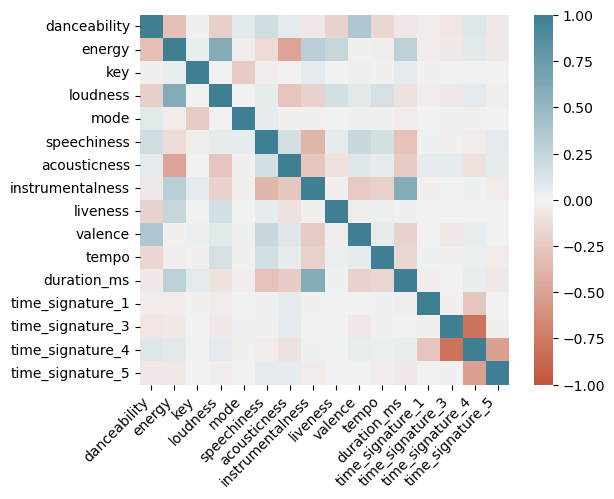

In [83]:
import seaborn as sns

# correlation between features

ax = sns.heatmap(
    features.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [84]:
# Perform Anomaly Detection
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

y_pred_list = []

envelope_pred = EllipticEnvelope().fit_predict(features)
y_pred_list.append(envelope_pred)

# apply IsolationForest AD
forest_pred = IsolationForest().fit_predict(features)
y_pred_list.append(forest_pred)

# apply LocalOutlierFactor AD
lof_pred = LocalOutlierFactor().fit_predict(features)
y_pred_list.append(lof_pred)

y_pred_list

[array([ 1, -1,  1, ...,  1,  1,  1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1])]

In [85]:
from collections import Counter

features_no_anomalies = features.copy()
labels_no_anomalies = labels.copy()
anomaly_indices = set()
for arr in y_pred_list:
    c = Counter(arr)
    print(c)
    i = len(arr) - 1
    while i >= 0:
        if arr[i] == -1:
            anomaly_indices.add(i)
        i -= 1
        
# Drop anomalies indicated by any of the 3 anomaly detection algorithms.
anomaly_indices = list(anomaly_indices)
anomaly_indices.sort()
features_no_anomalies = features_no_anomalies.drop(anomaly_indices, axis=0)
labels_no_anomalies = labels_no_anomalies.drop(anomaly_indices, axis=0)

features_no_anomalies = features_no_anomalies.reset_index().drop('index', axis=1)
labels_no_anomalies = labels_no_anomalies.reset_index().drop('index', axis=1)
label_groups = labels_no_anomalies.groupby('genre')
print(label_groups.size())

Counter({1: 38074, -1: 4231})
Counter({1: 37885, -1: 4420})
Counter({1: 40473, -1: 1832})
genre
Dark Trap          3152
Emo                1244
Hiphop             2058
Pop                 359
Rap                1341
RnB                1403
Trap Metal         1441
Underground Rap    4309
dnb                2771
hardstyle          2670
psytrance          2661
techhouse          2819
techno             2474
trance             2782
trap               2747
dtype: int64


In [86]:
# MAKE SURE TO NOT SCALE AND PCA BEFORE HAND

<h1> Model Building </h1>

### Naive Bayes Classification

As part of our group's brainstorming process for which classifier types would be most appropriate to train our data on, we chose to try Naive Bayes since it is not susceptible to the curse of dimensionality (and we have a quite a few features we are using). Since Naive Bayes assumes that all features are conditionally independent of each other given the label and our features were weakly correlated with each other, we thought this was an additional reason this classifier could be appropriate.

Gaussian Naive Bayes was the only subtype of this classifier that we were able to use since it allowed for use of continuous feature values. Multinomial and Categorical required discrete feature values, Complement needed nonnegative values, and Bernoilli relied on binary feature values, so we couldn't use any of these while using all of our features (original and reduced dimensionality).

In [87]:
import sklearn.naive_bayes

# Create a Gaussian Naive Bayes classifier.
gnb = sk.naive_bayes.GaussianNB()

# Run 10-fold cross validation on classifier.
accuracies = sk.model_selection.cross_val_score(gnb, features, list(labels), cv=10)

# Print the accuracy of the cross-validated model.
avg_accuracy = accuracies.mean()
print("Accuracy:", (avg_accuracy * 100))


# Create a Gaussian Naive Bayes classifier for data without anomalies.
gnb_no_anomalies = sk.naive_bayes.GaussianNB()
labels_no_anomalies = labels_no_anomalies.iloc[:, 0]

# Run 10-fold cross validation on classifier for data without anomalies.
accuracies_no_anomalies = sk.model_selection.cross_val_score(gnb_no_anomalies, features_no_anomalies, labels_no_anomalies, cv=10)

# Print the accuracy of the cross-validated model for data without anomalies.
avg_accuracy_no_anomalies = accuracies_no_anomalies.mean()
print("Accuracy without anomalies:", (avg_accuracy_no_anomalies * 100))

Accuracy: 49.334593870637356
Accuracy without anomalies: 52.36474894269387


In [88]:
# Original code from Megan Sundheim's HW 4.

# Print the confusion matrix for the classifier.
pred_labels = sk.model_selection.cross_val_predict(gnb, features, labels, cv=10)
con_mat = sk.metrics.confusion_matrix(labels, pred_labels)
print("Confusion matrix:\n", con_mat)

# Display the classification report for the Naive Bayes classifier.
report = sk.metrics.classification_report(labels, pred_labels)
print("\nClassification Report:\n", report)


# Print the confusion matrix for the classifier without anomalies.
pred_labels_no_anomalies = sk.model_selection.cross_val_predict(gnb_no_anomalies, features_no_anomalies, labels_no_anomalies, cv=10)
con_mat_no_anomalies = sk.metrics.confusion_matrix(labels_no_anomalies, pred_labels_no_anomalies)
print("Confusion matrix:\n", con_mat)

# Display the classification report for the Naive Bayes classifier without anomalies.
report_no_anomalies = sk.metrics.classification_report(labels_no_anomalies, pred_labels_no_anomalies)
print("\nClassification Report:\n", report_no_anomalies)

Confusion matrix:
 [[ 155    0  231    0   29    0   14 2424   86  318   16  551   33  507
   214]
 [  16    0  168    0  122    0    0  591  153  177   11  160    6  140
   136]
 [  78    0  707    0  158    0    0 1076  408  169   23  171   14  153
    71]
 [   3    0   60    0   26    0    0  162   20   23    1  106    1   35
    24]
 [  28    0   31    0  538    0    1  617   49  142    9  177   11  132
   113]
 [  43    0  390    0   85    0    0  672  189  172   10  273   10  176
    79]
 [  18    0   34    0   16    0   28 1441   21  144    1  139    1   59
    54]
 [ 113    0  339    0  101    0   12 3794  221  426    6  403   11  271
   178]
 [   1    0    0    0    0    0    0   35 2930    0    0    0    0    0
     0]
 [   3    0    0    0    0    0    1   15    0 2640  142    0    0    0
   135]
 [   0    0    0    0    0    0    0   10    0   17 2710    2   58  141
    23]
 [   1    0    0    0    0    0    0   22    0    0    0 2263  673   16
     0]
 [   6    0    0    0

/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                  precision    recall  f1-score   support

      Dark Trap       0.32      0.03      0.06      4578
            Emo       0.00      0.00      0.00      1680
         Hiphop       0.36      0.23      0.28      3028
            Pop       0.00      0.00      0.00       461
            Rap       0.50      0.29      0.37      1848
            RnB       0.00      0.00      0.00      2099
     Trap Metal       0.49      0.01      0.03      1956
Underground Rap       0.34      0.65      0.44      5875
            dnb       0.72      0.99      0.83      2966
      hardstyle       0.48      0.90      0.63      2936
      psytrance       0.76      0.92      0.83      2961
      techhouse       0.46      0.76      0.57      2975
         techno       0.68      0.80      0.73      2956
         trance       0.40      0.44      0.42      2999
           trap       0.55      0.48      0.51      2987

       accuracy                           0.49     42305
    

/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                  precision    recall  f1-score   support

      Dark Trap       0.22      0.01      0.02      3152
            Emo       0.00      0.00      0.00      1244
         Hiphop       0.38      0.26      0.31      2058
            Pop       0.00      0.00      0.00       359
            Rap       0.46      0.23      0.31      1341
            RnB       0.00      0.00      0.00      1403
     Trap Metal       0.55      0.02      0.05      1441
Underground Rap       0.36      0.61      0.45      4309
            dnb       0.75      0.99      0.85      2771
      hardstyle       0.50      0.89      0.64      2670
      psytrance       0.76      0.92      0.83      2661
      techhouse       0.49      0.77      0.60      2819
         techno       0.66      0.78      0.72      2474
         trance       0.42      0.48      0.45      2782
           trap       0.57      0.52      0.54      2747

       accuracy                           0.52     34231
    

/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meggsatron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modified code from Megan Sundheim's HW 4.

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Using SMOTE on data without anomalies to balance data.
gnb_no_anomalies = sk.naive_bayes.GaussianNB()
smote = imblearn.over_sampling.SMOTE()

gnb_pipeline = imblearn.pipeline.Pipeline(steps=[('smote', smote), ('classifier', gnb_no_anomalies)])

param_grid = {
    'smote__sampling_strategy': ['minority', 'not minority', 'not majority', 'all', 'auto'],
    'smote__k_neighbors': range(1, 11)
}

# Create GridSearchCV object from pipeline and param_grid, and set to 10-fold CV.
grid_search = sk.model_selection.GridSearchCV(gnb_pipeline, param_grid, cv=10)

# Fit GridSearchCV to training data.
grid_search.fit(features_no_anomalies, labels_no_anomalies)

# Show best values for hyperparameters.
print("Best hyperparameter values:", grid_search.best_params_)

# Print the accuracy when using best values for hyperparameters.
print("Accuracy with best values:", (grid_search.best_score_ * 100))


# Pass Pipeline into 10 fold nested CV.
nested_accuracies = sk.model_selection.cross_val_score(grid_search, features_no_anomalies, labels_no_anomalies, cv=10)

# Print the accuracy of tuned, cross-validated model.
avg_accuracy = nested_accuracies.mean()
print("Accuracy:", (avg_accuracy * 100))

# TODO: get more in depth with evaluation metrics, explain what this all means, and try some diff hyperparams and model types

Best hyperparameter values: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 'not minority'}
Accuracy with best values: 49.99266489607138


In [ ]:
#TODO gridsearch on smote hyperparams --> maybe just sample the amount from smallest class
"""
samp_records = []
samp_labels = []
for i in range(numPoints):
    index = random.randint(0, numEntries - 1)
    samp_records.append(music_data_pca.iloc[index, :])
    samp_labels.append(labels[index])
    """

In [ ]:
# TODO fix scaling (may want with no anomalies?)

import random
from sklearn.manifold import MDS

#TODO from hw 5
# do not change this plotting function!
numPoints = 1000
numEntries = music_data_pca.shape[0]
samp_records = []
samp_labels = []
for i in range(numPoints):
    index = random.randint(0, numEntries - 1)
    samp_records.append(music_data_pca.iloc[index, :])
    samp_labels.append(labels[index])

label_colors = []
color_dict = dict()
for label in samp_labels:
    if not label in color_dict.keys():
        # Originally found in https://stackoverflow.com/questions/28999287/generate-random-colors-rgb.
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        color_dict[label] = color
    label_colors.append(color_dict[label])


mds = MDS(n_components=2)
mds_data = mds.fit_transform(samp_records)

classes = dict()
for i in range(len(mds_data)):
    record = mds_data[i]
    label = samp_labels[i]
    if not label in classes.keys():
        classes[label] = [record]
    else:
        classes[label].append(record)

fig, axes = plt.subplots(len(classes.keys()) + 1, 1, figsize=(6, 100), sharey=True, sharex=True)
index = 1
for genre in classes.keys():
    ax = axes[index]
    index += 1
    data = pd.DataFrame(classes[genre])
    color = [color_dict[genre] for i in range(len(data))]
    axes[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=color, s=50, label=genre)
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=color, s=50, label=genre)

# Originally found in https://towardsdatascience.com/legend-outside-the-plot-matplotlib-5d9c1caa9d31#:~:text=Placing%20the%20legend%20outside%20of%20the%20plot&text=First%2C%20we%20need%20to%20shrink,control%20for%20manual%20legend%20placement.&text=Box%20that%20is%20used%20to,Defaults%20to%20axes.
axes[0].legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
index = 1
while index <= len(classes.keys()):
    ax = axes[index]
    ax.legend(loc='best')
    index += 1

In [ ]:
import math

rel_cohesion = dict()
# Calculate the cohesion (similarity) between points in each genre.
for genre in classes.keys():
    # Sum WSS over each genre.
    cohesion = 0
    data = df[df['genre'] == genre].drop('genre', axis=1)
    centroid = np.mean(data, axis=0)
    for i in range(0, len(data)):
        # Sum WSS over each data point in current cluster.
        record = data.iloc[i, :]
        cohesion += (math.sqrt(((record[0] - centroid[0]) ** 2) + (record[1] - centroid[1]) ** 2)) ** 2
    print("The cohesion of records in %s is %f." % (genre, cohesion))
    print("The cohesion of records in %s, relative to size, is %f.\n" % (genre, (cohesion / len(data))))
    rel_cohesion[genre] = cohesion / len(data)
    
# Sum WSS over all genres.
total_cohesion = 0
total_c = np.mean(features, axis=0)
for i in range(len(features)):
    record = features.iloc[i, :]
    total_cohesion += (math.sqrt(((record[0] - total_c[0]) ** 2) + (record[1] - total_c[1]) ** 2)) ** 2

rel_total = total_cohesion / len(features)
print("The cohesion of all records is %f." % (total_cohesion))
print("The relative cohesion of all records is %f." % (rel_total))

In [ ]:
#TODO at least cite from hw

# Print the confusion matrix for the classifier.
pred_labels = sk.model_selection.cross_val_predict(gnb, features, labels, cv=10)

# Display the classification report for the Naive Bayes classifier.
report = sk.metrics.classification_report(labels, pred_labels)
print("\nClassification Report:\n", report)
report = sk.metrics.classification_report(labels, pred_labels, output_dict=True)

In [ ]:
genre_f1 = dict()
genres = df.groupby('genre').groups.keys()
corr_df = []
for genre in genres:
    metrics = report[genre]
    f1 = metrics['f1-score']
    corr_df.append([f1, rel_cohesion[genre]])

corr_df = pd.DataFrame(corr_df, index=genres, columns=['f1-score', 'Relative Cohesion'])
print(corr_df.corr())


# Correlation between performance of Naive Bayes classification and relative cohesion of each genre's points.
ax = sns.heatmap(
    corr_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
# SMOTE and visualized confusion matrix and ROC curve.